i = 7955, nr. of outliers = 2
i = 7956, nr. of outliers = 2
i = 7957, nr. of outliers = 2
i = 7958, nr. of outliers = 2
i = 7959, nr. of outliers = 2
i = 7960, nr. of outliers = 2
i = 7961, nr. of outliers = 2
i = 7962, nr. of outliers = 2
i = 7963, nr. of outliers = 2
i = 7964, nr. of outliers = 2
i = 7965, nr. of outliers = 2
i = 7966, nr. of outliers = 2
i = 7967, nr. of outliers = 2
i = 7968, nr. of outliers = 2
i = 7969, nr. of outliers = 2
i = 7970, nr. of outliers = 2
i = 7971, nr. of outliers = 2
i = 7972, nr. of outliers = 2
i = 7973, nr. of outliers = 2
i = 7974, nr. of outliers = 2
i = 7975, nr. of outliers = 2
i = 7976, nr. of outliers = 2
i = 7977, nr. of outliers = 2
i = 7978, nr. of outliers = 2
i = 7979, nr. of outliers = 2
i = 7980, nr. of outliers = 2
i = 7981, nr. of outliers = 2
i = 7982, nr. of outliers = 2
i = 7983, nr. of outliers = 2
i = 7984, nr. of outliers = 2
i = 7985, nr. of outliers = 2
i = 7986, nr. of outliers = 2
i = 7987, nr. of outliers = 2
i = 7988, 

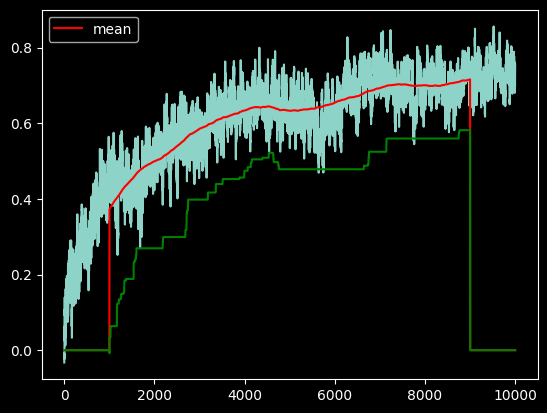

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

run = 1
rho = 0.1
L=50
p=0.8
iterations = 10000
phi_values = np.genfromtxt(f'./results/runs_{run}_p_{p}_rho_{rho}_L_{L}_iters_{iterations}.csv', delimiter = ',', skip_header=1)
phi_values = phi_values[:,1]
mean = np.zeros(iterations)
CI_int = np.zeros((iterations,2))
teller0 = 0
teller1 = [[] for _ in range(iterations)]


for i in range(iterations):
    if i > 1000 and i < 9000:
        slope, intercept, r_value, p_values, se = stats.linregress([np.linspace(0, 1999, 2000), phi_values[i-1000:i+1000]])
        mean[i] = np.mean(phi_values[i-1000:i+1000])
        CI_int[i] = np.percentile(phi_values[i-1000:i+1000], [0.1, 100])
        # If the slope is not distinguishable from 0
        if p_values > 0.05:     
            teller0 = 0
            # Count number of outliers seen by iteration i
            for j in range(2000):
                if phi_values[i+j-999] < CI_int[i+j-999, 0]:
                    teller0 += 1
            teller1[i] = teller0
        
        # Find the last index that saw the least amount of outliers
        teller1_inv = teller1[::-1]
        min_value_teller = np.min(teller1_inv)
        index_min_val = teller1_inv.index(min_value_teller)
        actual_index = iterations - index_min_val

        # Save the phi_value that respresents a point in our 3D plot.
        phi_value_act = mean(actual_index)


# plt.plot(phi_values)
# plt.plot(mean, color='r', label='mean')
# plt.plot(CI_int[:,0], color='g')
# plt.legend()
# plt.show()